In [22]:
import numpy as np
# import math
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

def poly(d):
    if d%4==1:
        def p(x):
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = 1
            else:
                val = -1
            if abs(x)<=d:
                return val
            elif x == d+1:
                return val+1
            elif x == -(d+1):
                return val-1
            elif x == d+2:
                return val + (d+2)
            elif x == -(d+2):
                return val - (d+2)
            else:
                print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return 0
    elif d%4==3:
        def p(x):
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = -1
            else:
                val = 1
            if abs(x)<=d:
                return val
            elif x == d+1:
                return val+1
            elif x == -(d+1):
                return val-1
            elif x == d+2:
                return val + (d+2)
            elif x == -(d+2):
                return val - (d+2)
            else:
                print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return 0
    else:
        print("Warning, this value of d has not yet been implemented!")
        def p(x):
            return x
        
    return p
            
def Henon(p,X):
    return [X[1],-X[0]+p(X[1])]

def trace_pt(p,X,box_range):
    orbit = []
    while X not in orbit:
        orbit.append(X)
        X = Henon(p,X)
        if abs(X[0])>box_range or abs(X[1])>box_range:
            return []
    orbit.append(X)
    return orbit


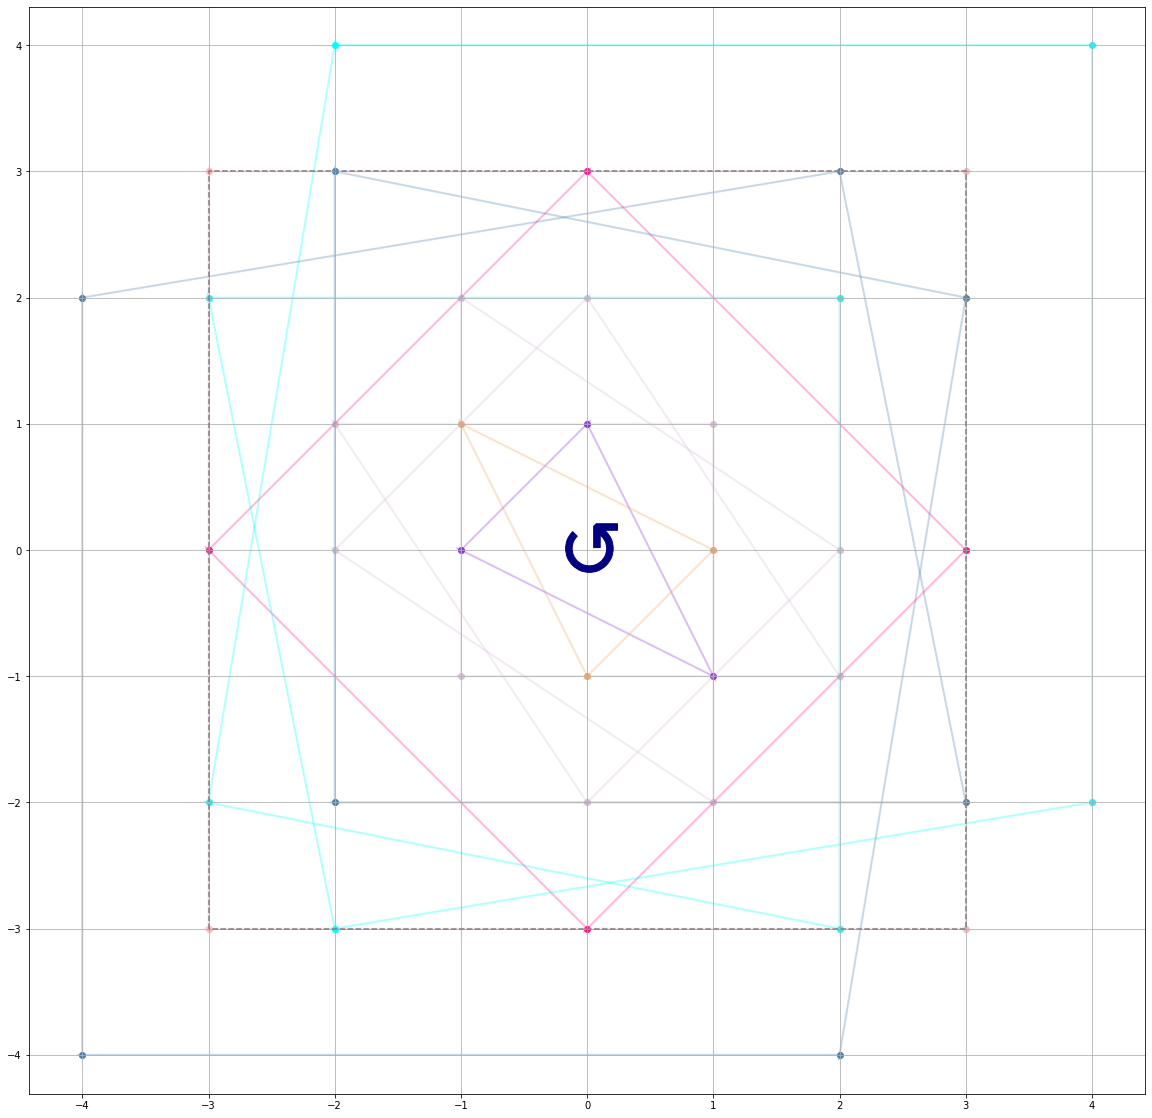

In [28]:
d = 3
p = poly(d)
box_range = d+2
check_range = d+2
visited = []
col_index = 0
colours=["navy","mediumblue","slateblue","blueviolet","indigo","mediumorchid","thistle","plum","magenta","deeppink","crimson","lightpink","salmon","red","brown","maroon","saddlebrown","peru","sandybrown","lightsalmon","darkorange","goldenrod","gold","khaki","y","olive","olivedrab","yellowgreen","chartreuse", "limegreen", "g", "seagreen","mediumaquamarine","lightseagreen","teal","c","aqua","deepskyblue","lightskyblue","steelblue"]
colours = [colours[3*i%len(colours)] for i in range(0,len(colours))]
plt.figure(figsize = (20,20))
xs = [-d,-d,d,d,-d]
ys = [-d,d,d,-d,-d]
plt.plot(xs,ys,"--",color = "grey")
for i in range(0,check_range+1):
    for j in range(0,check_range+1):
        if [i,j] not in visited:
            orbit = trace_pt(p,[i,j],box_range)
            for pt in orbit:
                visited.append(pt)
            col = colours[col_index % len(colours)]
            if len(orbit) == 2:
                plt.plot(orbit[0][0],orbit[0][1],marker=r'$\circlearrowleft$',ms=300/box_range,color = col)
            else:
                xs = [orbit[i][0] for i in range(len(orbit)-1)]
                ys = [orbit[i][1] for i in range(len(orbit)-1)]
                plt.scatter(xs,ys,color = col)
                for k in range(len(orbit)-1):
                    plt.arrow(orbit[k][0],orbit[k][1],orbit[k+1][0]-orbit[k][0],orbit[k+1][1]-orbit[k][1],width=.01,color = col,alpha =0.2)
            col_index +=1

plt.grid(which="both")
plt.xticks([i for i in range(-box_range-1,box_range+1)])
plt.yticks([i for i in range(-box_range-1,box_range+1)])
plt.axis('equal')
plt.savefig("./plots/The cycles in the Henon map for d="+str(d)+"")
plt.close()